This file will show how the capacity, underfitting, and overfitting look in graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt

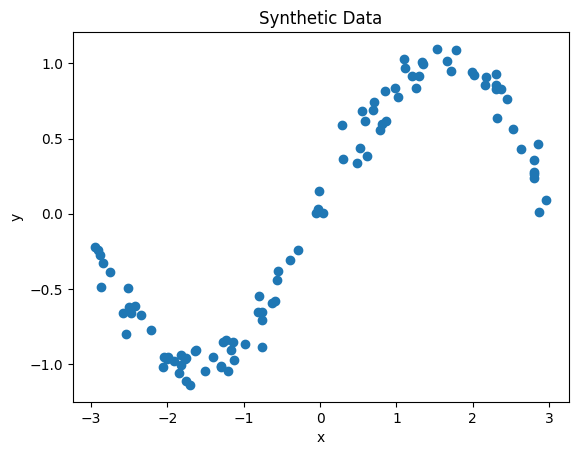

In [ ]:
x = np.random.uniform(-3, 3, 100)

### Use sine function to generate non-linear data with noise
y = np.sin(x) + np.random.normal(0, 0.1, x.shape)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Optimal Degree: 6, Train MSE: 0.006940418560997683, Test MSE: 0.015822258532011742


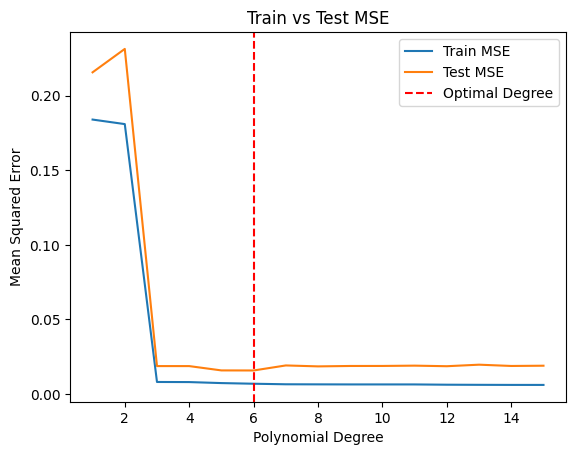

In [ ]:
degree = range(1, 16)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  

train_errors = []
test_errors = []

### Loop over different polynomial degrees and record MSE for train and test sets
for d in degree:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

### Find the degree with the lowest test MSE
idxm = np.argmin(test_errors)
print(f'Optimal Degree: {degree[idxm]}, Train MSE: {train_errors[idxm]}, Test MSE: {test_errors[idxm]}')

### Plotting the train and test MSE
plt.plot(degree, train_errors, label='Train MSE')
plt.plot(degree, test_errors, label='Test MSE')
plt.axvline(x=degree[idxm], color='r', linestyle='--', label='Optimal Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE')
plt.legend()
plt.show()




Underfit Example - Degree 1, Train MSE: 0.18390888997000984, Test MSE: 0.21555526135047937


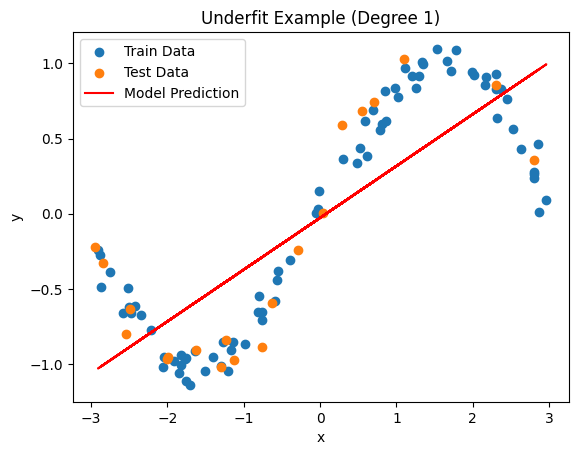

In [ ]:
###Underfit example
poly = PolynomialFeatures(degree=1) ###Degree 1 for underfitting

### Transform the data to polynomial features with degree 1
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.transform(X_test.reshape(-1, 1))

### Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

### Predict and calculate MSE
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Underfit Example - Degree 1, Train MSE: {train_mse}, Test MSE: {test_mse}')

### Plot the results
plt.scatter(X_train, y_train, label='Train Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_train, y_train_pred, color='r', label='Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Underfit Example (Degree 1)')
plt.legend()
plt.show()

Overfit Example - Degree 30, Train MSE: 0.01214802977733545, Test MSE: 4.1387183002753565


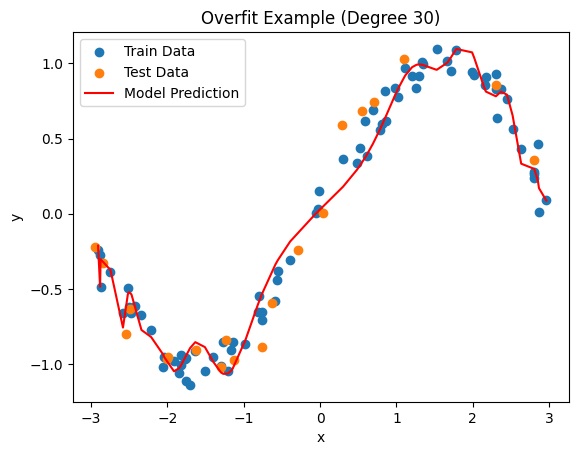

In [30]:
### Overfit example

### Sort X_train for better plotting
idx = np.argsort(X_train.ravel())
poly = PolynomialFeatures(degree=30) ###Degree 30 for overfitting
### Transform the data to polynomial features with degree 30
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.transform(X_test.reshape(-1, 1))
### Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)
### Predict and calculate MSE
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Overfit Example - Degree 30, Train MSE: {train_mse}, Test MSE: {test_mse}')
### Plot the results
plt.scatter(X_train, y_train, label='Train Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_train[idx], y_train_pred[idx], color='r', label='Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfit Example (Degree 30)')
plt.legend()
plt.show()

Appropriate Fit Example - Degree 6, Train MSE: 0.006940418560997683, Test MSE: 0.015822258532011742


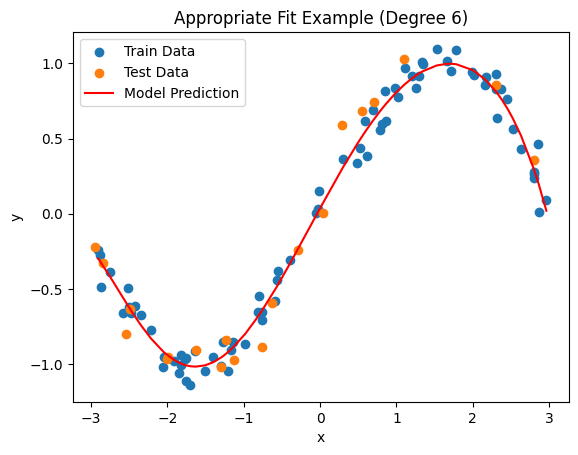

In [27]:
### Appropriate fit example

### Sort X_train for better plotting
idx = np.argsort(X_train.ravel())
poly = PolynomialFeatures(degree=6) ###Degree 6 for appropriate fitting
### Transform the data to polynomial features with degree 6
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.transform(X_test.reshape(-1, 1))
### Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)
### Predict and calculate MSE
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Appropriate Fit Example - Degree 6, Train MSE: {train_mse}, Test MSE: {test_mse}')
### Plot the results
plt.scatter(X_train, y_train, label='Train Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_train[idx], y_train_pred[idx], color='r', label='Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Appropriate Fit Example (Degree 6)')
plt.legend()
plt.show()

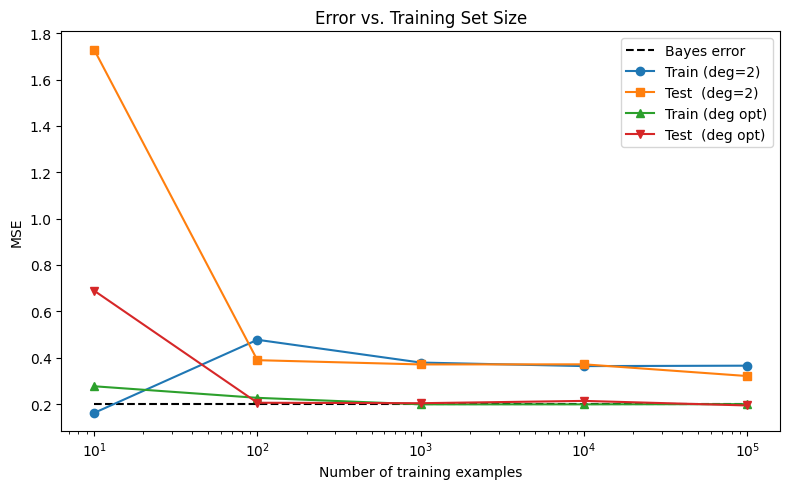

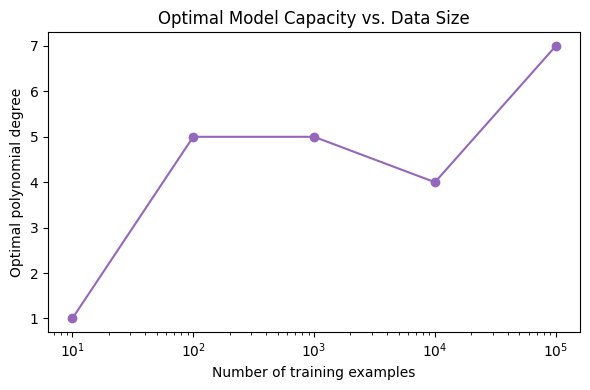

In [41]:
### We will then elaborate more on Bayes error, and more on the optimal capacity.

def f(x):
    return np.sin(x)

### Bayes error is the irreducible error due to noise in the data
sigma2 = 0.2 # Noise variance -> This is the bayes error

def generate_data(n_train, n_test, a=-3, b=3):
    x_train = np.random.uniform(a, b, n_train)
    y_train = f(x_train) + np.random.normal(0, np.sqrt(sigma2), n_train)
    
    x_test = np.random.uniform(a, b, n_test)
    y_test = f(x_test) + np.random.normal(0, np.sqrt(sigma2), n_test)
    
    return x_train, y_train, x_test, y_test

training_sizes = np.unique(
    np.logspace(0, 5, num=50, base=10, dtype=int)
)
degrees = range(1, 30)

bayes_list = []
train_quad = []
test_quad = []
train_opt = []
test_opt = []
opt_degrees = []

for n in training_size:
    # a) generate data
    X_tr, y_tr, X_te, y_te = generate_data(n, n_test=500)
    
    # b) Bayes error is noise variance
    bayes_list.append(sigma2)
    
    # c) Quadratic model (degree=2)
    poly2     = PolynomialFeatures(degree=2)
    X2_tr     = poly2.fit_transform(X_tr.reshape(-1,1))
    X2_te     = poly2.transform(   X_te.reshape(-1,1))
    quad      = LinearRegression().fit(X2_tr, y_tr)
    train_quad.append(mean_squared_error(y_tr, quad.predict(X2_tr)))
    test_quad .append(mean_squared_error(y_te, quad.predict(X2_te)))
    
    # d) Find optimal degree by test-MSE
    mse_by_degree = []
    for d in degrees:
        poly_d = PolynomialFeatures(degree=d)
        Xd_tr  = poly_d.fit_transform(X_tr.reshape(-1,1))
        Xd_te  = poly_d.transform(   X_te.reshape(-1,1))
        model  = LinearRegression().fit(Xd_tr, y_tr)
        mse_by_degree.append(mean_squared_error(y_te, model.predict(Xd_te)))
    
    # locate best degree
    best_idx    = int(np.argmin(mse_by_degree))
    d_opt       = degrees[best_idx]
    opt_degrees.append(d_opt)
    
    # e) Re-fit optimal model at d_opt
    poly_opt = PolynomialFeatures(degree=d_opt)
    Xo_tr    = poly_opt.fit_transform(X_tr.reshape(-1,1))
    Xo_te    = poly_opt.transform(   X_te.reshape(-1,1))
    model_opt= LinearRegression().fit(Xo_tr, y_tr)
    train_opt.append(mean_squared_error(y_tr, model_opt.predict(Xo_tr)))
    test_opt .append(mean_squared_error(y_te, model_opt.predict(Xo_te)))



### Plotting the results
plt.figure(figsize=(8,5))

plt.plot(training_size, bayes_list,  '--', color='black', label='Bayes error')
plt.plot(training_size, train_quad,  '-o', color='C0', label='Train (deg=2)')
plt.plot(training_size, test_quad,   '-s', color='C1', label='Test  (deg=2)')
plt.plot(training_size, train_opt,   '-^', color='C2', label='Train (deg opt)')
plt.plot(training_size, test_opt,    '-v', color='C3', label='Test  (deg opt)')

plt.xscale('log')   # optional: data sizes often on log axis
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.title('Error vs. Training Set Size')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(training_size, opt_degrees, '-o', color='C4')
plt.xscale('log')
plt.xlabel('Number of training examples')
plt.ylabel('Optimal polynomial degree')
plt.title('Optimal Model Capacity vs. Data Size')
plt.tight_layout()
plt.show()




